# Subsetting ICESat-2 Data
This notebook ({nb-download}`download <IS2_data_access2-subsetting.ipynb>`) illustrates the use of icepyx for subsetting ICESat-2 data ordered through the NSIDC DAAC. We'll show how to find out what subsetting options are available and how to specify the subsetting options for your order.

For more information on using icepyx to find, order, and download data, see our complimentary [ICESat-2 Data Access Notebook](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html).

Questions? Be sure to check out the FAQs throughout this notebook, indicated as italic headings.

### _What is SUBSETTING anyway?_

_Anyone who's worked with geospatial data has probably encountered subsetting. Typically, we search for data wherever it is stored and download the chunks (aka granules, scenes, passes, swaths, etc.) that contain something we are interested in. Then, we have to extract from each chunk the pieces we actually want to analyze. Those pieces might be geospatial (i.e. an area of interest), temporal (i.e. certain months of a time series), and/or certain variables. This process of extracting the data we are going to use is called subsetting._

_In the case of ICESat-2 data coming from the NSIDC DAAC, we can do this subsetting step on the data prior to download, reducing our number of data processing steps and resulting in smaller, faster downloads and storage._

In [1]:
%mamba uninstall -y icepyx

Removing specs: ['icepyx']
Transaction

  Prefix: /srv/conda/envs/notebook

  Failure: packages to remove not found in the environment:

  - icepyx

The following packages are missing from the target environment:
  - icepyx


PackagesNotFoundError: The following packages are missing from the target environment:
  - icepyx



Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install git+https://github.com/icesat2py/icepyx.git@harmony-take2

  Cloning https://github.com/icesat2py/icepyx.git (to revision harmony-take2) to /tmp/pip-req-build-ly550u3f
  Running command git clone --filter=blob:none --quiet https://github.com/icesat2py/icepyx.git /tmp/pip-req-build-ly550u3f
  Running command git checkout -b harmony-take2 --track origin/harmony-take2
  Switched to a new branch 'harmony-take2'
  branch 'harmony-take2' set up to track 'origin/harmony-take2'.
  Resolved https://github.com/icesat2py/icepyx.git to commit 2581fd80b28c4e3e2f811f34bbe981c1274c1765
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


Import packages, including icepyx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
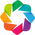

In [3]:
import icepyx as ipx

import numpy as np
import xarray as xr
import pandas as pd

import h5py
import os,json
from pprint import pprint

Create a query object and log in to Earthdata

For this example, we'll be working with a sea ice product (ATL09) for an area along West Greenland (Disko Bay).

In [4]:
region_a = ipx.Query('ATL09',[-55, 68, -48, 71],['2019-02-22','2019-02-28'], \
                           start_time='00:00:00', end_time='23:59:59')

```{admonition} Important Authentication Update
Previously, icepyx required you to explicitly use the `.earthdata_login()` function to login. Running this function is deprecated and will result in an error, as icepyx will call the login function as needed. The user will still need to provide their credentials.
```

## Discover Subsetting Options

You can see what subsetting options are available for a given product by calling `show_custom_options()`. The options are presented as a series of headings followed by available values in square brackets. Headings are:
* **Subsetting Options**: whether or not temporal and spatial subsetting are available for the data product
* **Data File Formats (Reformatting Options)**: return the data in a format other than the native hdf5 (submitted as a key=value kwarg to `order_granules(format='NetCDF4-CF')`)
* **Data File (Reformatting) Options Supporting Reprojection**: return the data in a reprojected reference frame. These will be available for gridded ICESat-2 L3B data products.
* **Data File (Reformatting) Options NOT Supporting Reprojection**: data file formats that cannot be delivered with reprojection
* **Data Variables (also Subsettable)**: a dictionary of variable name keys and the paths to those variables available in the product

In [5]:
region_a.show_custom_options()

{
  "conceptId": "C2649212495-NSIDC_CPRD",
  "shortName": "ATL09",
  "variableSubset": false,
  "bboxSubset": true,
  "shapeSubset": true,
  "temporalSubset": true,
  "concatenate": false,
  "reproject": false,
  "outputFormats": [
    "application/x-hdf"
  ],
  "services": [
    {
      "name": "sds/trajectory-subsetter",
      "href": "https://cmr.earthdata.nasa.gov/search/concepts/S2836723123-XYZ_PROV",
      "capabilities": {
        "subsetting": {
          "temporal": true,
          "bbox": true,
          "shape": true,
          "variable": true
        },
        "output_formats": [
          "application/x-hdf"
        ]
      }
    }
  ],
  "variables": [],
  "capabilitiesVersion": "2"
}


By default, spatial and temporal subsetting based on your initial inputs is applied to your order unless you specify `subset=False` to `order_granules()` or `download_granules()` (which calls `order_granules` under the hood if you have not already placed your order) functions.
Additional subsetting options must be specified as keyword arguments to the order/download functions.

Although some file format conversions and reprojections are possible using the `format`, `projection`,and `projection_parameters` keywords, the rest of this tutorial will focus on variable subsetting, which is provided with the `Coverage` keyword.

### _Why do I have to provide spatial bounds to icepyx even if I don't use them to subset my data order?_

_Because they're still needed for the granule level search._
_Spatial inputs are usually required for any data search, on any platform, even if your search parameters cover the entire globe._

_The spatial information you provide is used to search the data repository and determine which granules might contain data over your area of interest._
_When you use that spatial information for subsetting, it's actually asking the NSIDC subsetter to extract the appropriate data from each granule._
_Thus, even if you set `subset=False` and download entire granules, you still need to provide some inputs on what geographic area you'd like data for._

## About Data Variables in a query object

A given ICESat-2 product may have over 200 variable + path combinations.
icepyx includes a custom `Variables` module that is "aware" of the ATLAS sensor and how the ICESat-2 data products are stored.
The [ICESat-2 Data Variables Example](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_variables.html) provides a detailed set of examples on how to use icepyx's built in `Variables` module.

Thus, this notebook uses a default list of wanted variables to showcase subsetting and refers the user to the aforementioned Jupyter Notebook for a more thorough exploration of ICESat-2 product variables.

## _Why not just download all the data and subset locally? What if I need more variables/granules?_

_Taking advantage of the NSIDC subsetter is a great way to reduce your download size and thus your download time and the amount of storage required, especially if you're storing your data locally during analysis. By downloading your data using icepyx, it is easy to go back and get additional data with the same, similar, or different parameters (e.g. you can keep the same spatial and temporal bounds but change the variable list). Related tools (e.g. [`captoolkit`](https://github.com/fspaolo/captoolkit)) will let you easily merge files if you're uncomfortable merging them during read-in for processing._

In [6]:
short_name = 'ATL06'
spatial_extent = './supporting_files/simple_test_poly.gpkg'
date_range = ['2019-10-01','2019-10-05']

In [7]:
region_a = ipx.Query(short_name, spatial_extent
, 
   cycles=['03','04','05','06'], tracks=['0849','0902'])

print(region_a.product)
print(region_a.product_version)
print(region_a.cycles)
print(region_a.tracks)
print(region_a.spatial_extent)

ATL06
006
['03', '04', '05', '06']
['0849', '0902']
('polygon', [-55.0, 68.0, -55.0, 71.0, -48.0, 71.0, -48.0, 68.0, -55.0, 68.0])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
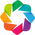

:Overlay
   .WMTS.I :WMTS   [Longitude,Latitude]
   .Path.I :Path   [Longitude,Latitude]

In [8]:
region_a.visualize_spatial_extent()

We can still print a list of available granules for our query

In [9]:
region_a.avail_granules(cloud=True)

[['s3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/05/23/ATL06_20190523204321_08490305_006_02.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/05/27/ATL06_20190527075008_09020303_006_02.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/08/22/ATL06_20190822162310_08490405_006_02.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/08/26/ATL06_20190826032957_09020403_006_02.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/11/21/ATL06_20191121120302_08490505_006_01.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2019/11/24/ATL06_20191124230949_09020503_006_01.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/02/20/ATL06_20200220074245_08490605_006_01.h5',
  's3://nsidc-cumulus-prod-protected/ATLAS/ATL06/006/2020/02/23/ATL06_20200223184932_09020603_006_01.h5']]

## Applying variable subsetting to your order and download

In order to have your wanted variable list included with your order, you must pass it as a keyword argument to the `subsetparams()` attribute or the `order_granules()` or `download_granules()` (which calls `order_granules` under the hood if you have not already placed your order) functions.

In [10]:
order = region_a.order_granules(subset=True) 
order

Harmony job ID:  a98665dd-abd1-4870-8c9e-e60bae768f18
Initial status of your harmony order request: running


Job ID,Type,Status,Details
a98665dd-abd1-4870-8c9e-e60bae768f18,subset,running,View Details


### Checking an order status

In [11]:
order.status()

{'status': 'running',
 'message': 'The job is being processed',
 'progress': 0,
 'created_at': datetime.datetime(2025, 3, 6, 23, 26, 1, 922000, tzinfo=tzlocal()),
 'updated_at': datetime.datetime(2025, 3, 6, 23, 26, 1, 922000, tzinfo=tzlocal()),
 'created_at_local': '2025-03-06T23:26:01+00:00',
 'updated_at_local': '2025-03-06T23:26:01+00:00',
 'num_input_granules': 8,
 'data_expiration': datetime.datetime(2025, 4, 5, 23, 26, 1, 922000, tzinfo=tzlocal()),
 'data_expiration_local': '2025-04-05T23:26:01+00:00',
 'order_url': 'https://harmony.earthdata.nasa.gov/workflow-ui/a98665dd-abd1-4870-8c9e-e60bae768f18'}

### Downloading subsetted granules

In [12]:
files = order.download_granules("./data")

data/93451573_ATL06_20190822162310_08490405_006_02_subsetted.h5
data/93451572_ATL06_20190527075008_09020303_006_02_subsetted.h5
data/93451571_ATL06_20190523204321_08490305_006_02_subsetted.h5
data/93451574_ATL06_20190826032957_09020403_006_02_subsetted.h5
data/93451576_ATL06_20191124230949_09020503_006_01_subsetted.h5
data/93451575_ATL06_20191121120302_08490505_006_01_subsetted.h5
data/93451577_ATL06_20200220074245_08490605_006_01_subsetted.h5
data/93451578_ATL06_20200223184932_09020603_006_01_subsetted.h5


### _Why does the subsetter say no matching data was found?_
_Sometimes, granules ("files") returned in our initial search end up not containing any data in our specified area of interest._
_This is because the initial search is completed using summary metadata for a granule._
_You've likely encountered this before when viewing available imagery online: your spatial search turns up a bunch of images with only a few border or corner pixels, maybe even in no data regions, in your area of interest._
_Thus, when you go to extract the data from the area you want (i.e. spatially subset it), you don't get any usable data from that image._

## Handling large orders

By default the Harmony subsetter will only process the first 300 granules for large orders, placing them into a "previewing" status. This allows users to check that results look correct. Once the job has completed its preview, which includes the first 100 granules, then we can resume the order if we are satisfied that our request is correct. The following guidance is commented out by default, and can be uncommented to test this large order behavior.

In [13]:
# short_name = 'ATL06'
# spatial_extent = './supporting_files/simple_test_poly.gpkg'
# date_range = ['2018-10-01','2020-02-05']

# region_a = ipx.Query(short_name, spatial_extent, date_range)

# order = region_a.order_granules(subset=True) 
# order

This order includes 311 input granules, and therefore it is automatically placed into a previewing state. We can inspect the status of this order and wait until it moves to a "paused" state, once the initial 100 granules are complete.

In [14]:
# order.status()

If we are satisfied with the order, then we can resume processing:

In [15]:
# order.resume()
# order

## Work with the downloaded data

Now that the subsetted files have been downloaded, we can now work with them using the `icepyx` [Read](https://icepyx.readthedocs.io/en/latest/user_guide/documentation/read.html) class. See the [Reading ICESat-2 Data in for Analysis](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html#) notebook for more information. 

#### Credits
* notebook contributors: Zheng Liu, Jessica Scheick, and Amy Steiker
* some source material: [NSIDC Data Access Notebook](https://github.com/ICESAT-2HackWeek/ICESat2_hackweek_tutorials/tree/main/03_NSIDCDataAccess_Steiker) by Amy Steiker and Bruce Wallin